# Ticket Draw
Pick winner by a logarithmitically scaled probability distribution

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Point distribution

In [20]:
dataframe = pd.read_csv('Poengfordeling.csv', delimiter=';')
dataframe

,Unnamed: 0,Sondre Bolland,Rein Undheim,Thea Gjerde,Ragnhild Larsen,Henriette Rebnor,Beatrix Wu,Anton Nydal,Håkon Bleie,Oskar Jahr,Ingeborg Elly Skori-Holm,Sigurd Setså,Benjamin Øygarden,Bendik Micheeff,Vanessa Marie Haaland,Celine Langeland
0,Januar,230.0,63.0,88.0,"45,5",58.0,"45,5",21.0,49.0,93.0,55.0,100,14.0,90.0,0.0,0.0
1,Feburar,255.0,14.0,71.0,"71,5",30.0,151,0.0,4.0,60.0,125.0,"81,5",20.0,0.0,50.0,38.0
2,Mars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Total,485.0,77.0,159.0,117,88.0,"196,5",21.0,53.0,153.0,180.0,"181,5",34.0,90.0,50.0,38.0


In [184]:
def scale_all_points(point_list):
    ticket_list = []
    for points in point_list:
        scaled_points = scale_points(points)
        ticket_list.append(scaled_points)
    return ticket_list

def scale_points(points):
    '''
    Calculates the number of tickets from number of points using a logarithmic scale
    '''
    tickets = log_func(points)
    return tickets
    
def log_func(x):
    return np.log10(x) * 100
    
def plot_tickets_and_points(name_list, point_list, ticket_list):
    x = np.arange(0, 300)
    y = log_func(x)

    #plt.scatter(point_list, ticket_list, label= "tickets", color= "green",  
            #marker= "*", s=30)
    for i, name in enumerate(name_list):
        x = point_list[i]
        y = ticket_list[i]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+0.9, y+0.9, name, fontsize=9)
    plt.xlabel("Points") 
    plt.ylabel("Tickets")
    plt.show()
    
def plot_winner_count(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    
    fig = plt.figure(figsize = (12, 5)) 
    
    plt.bar(keys, values,  
        width = 0.4)
    
    plt.xlabel("Contestants") 
    plt.ylabel("Wins") 
    plt.title("Number of wins") 
    plt.show() 

## February

In [162]:
names = list(dataframe.head())[1:]

february_row = dataframe.loc[1]
february_points = list(february_row.values[1:])
february_points = [float(i.replace(',','.')) if isinstance(i, str) else float(i) for i in february_points]

for name, points in zip(names, february_points):
    if points == 0:
        names.remove(name)
        february_points.remove(points)

first_names = [name.split(' ', 1)[0] for name in names]
print(first_names)
print(names)
print(february_points)

['Sondre', 'Rein', 'Thea', 'Ragnhild', 'Henriette', 'Beatrix', 'Håkon', 'Oskar', 'Ingeborg', 'Sigurd', 'Benjamin', 'Vanessa', 'Celine']
['Sondre Bolland', 'Rein Undheim', 'Thea Gjerde', 'Ragnhild Larsen', 'Henriette Rebnor', 'Beatrix Wu', 'Håkon Bleie', 'Oskar Jahr', 'Ingeborg Elly Skori-Holm', 'Sigurd Setså', 'Benjamin Øygarden', 'Vanessa Marie Haaland', 'Celine Langeland']
[255.0, 14.0, 71.0, 71.5, 30.0, 151.0, 4.0, 60.0, 125.0, 81.5, 20.0, 50.0, 38.0]


### Tickets from scaled points

Tickets:
[240.6540180433955, 114.61280356782379, 185.12583487190753, 185.43060418010805, 147.71212547196623, 217.89769472931692, 60.20599913279624, 177.81512503836436, 209.69100130080562, 191.11576087399766, 130.10299956639813, 169.89700043360187, 157.978359661681]


c:\users\sondr\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


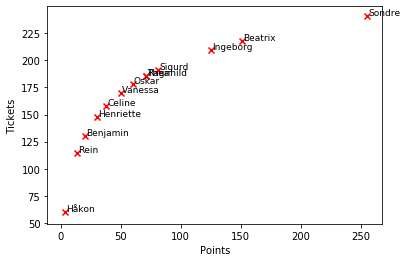

In [185]:
february_tickets = scale_all_points(february_points)
print('Tickets:')
print(february_tickets)

plot_tickets_and_points(first_names, february_points, february_tickets)

### Winner distribution after 10 000 draws

In [174]:
def choose_winner(names, ticket_list, seed=None):
    if seed != None:
        np.random.seed(seed)
    n_participants = len(names)
    total_tickets= np.sum(ticket_list)
    ticket_probability_distribution = [x / total_tickets for x in ticket_list]
    #print('\nTicket probability distribution:')
    #print(february_probability_distribution)
    
    winner_index = np.random.choice(np.arange(0, n_participants), p=ticket_probability_distribution)
    winner = names[winner_index]
    return winner, winner_index

In [177]:
winner_list = []
for i in range(10000):
    winner, winner_index = choose_winner(names, february_tickets)
    winner_list.append(winner_index)
number_of_wins = {first_names[i]:winner_list.count(i) for i in winner_list}
number_of_wins = {k: v for k, v in sorted(number_of_wins.items(), key=lambda item: item[1])}

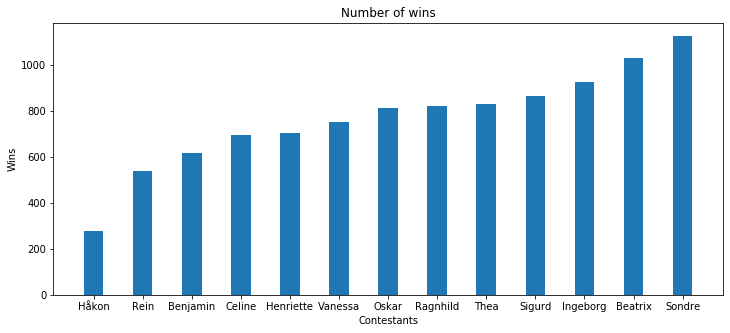

In [183]:
plot_winner_count(number_of_wins)

In [186]:
winner, winner_index =  choose_winner(names, february_tickets, seed=69)
print(f'The winner of february is {winner}')

The winner of february is Ragnhild Larsen
